1. 데이터 분석(EDA) 및 시각화
2. 전처리 및 스케일링
3. 8가지 모델 사용하여 결과 예측
4. 위 결과 시각화
5. 가장 성능이좋은 top3 모델로 앙상블
6. 앙상블한 새 모델 하이퍼튜닝하여 결과 예측
7. 위 결과 시각화
8. 성능 평가

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
filePath = 'data/titanic/train.csv'
df = pd.read_csv(filePath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 전처리 및 스케일링

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

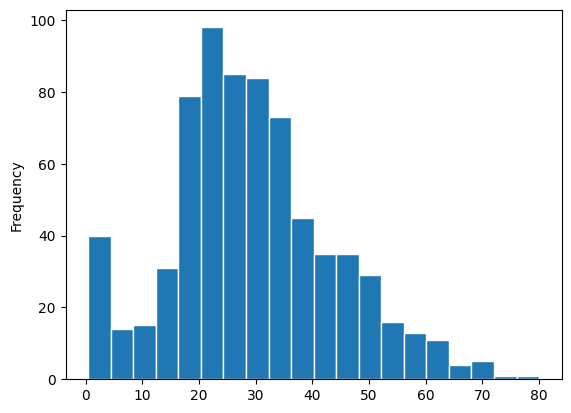

In [7]:
# Age 컬럼의 분포도 시각화
df['Age'].plot(kind='hist', bins=20, edgecolor='white')
plt.show()

In [8]:
# 0~3세, 4~7세, 8~15세, 16~30세, 31~60세, 61~81세
df['Age_cat'] = pd.cut(df['Age'], bins=[0, 3, 7, 15, 30, 60, 81], labels=['baby', 'children', 'teenage', 'young', 'adult', 'elder'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
# df['Age'].median()
# df['Age'].isna().sum()
df['Embarked'].isna().sum()

np.int64(2)

In [11]:
# 결측치 채우기 (Age -> 중앙값으로 채우기 (28))
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
# 결측치 채우기 (Embarked -> 최빈값으로 채우기 (S))
# 성능이 안나오면 Embarked의 2개 NaN 데이터가 1등급 승객이므로 1등급의 최빈값으로 채우고 다시 해보기 2건이지만..^^
# mode()는 최빈값 여러개일 수도 생각하고 Series를 반환하므로 0번째를 붙여줘야 해 오류안나고 실행결과만 잘못나와
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_cat        177
dtype: int64

In [14]:
# 삭제 컬럼
df.drop(columns=['PassengerId','Cabin', 'Ticket'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    object  
 9   Age_cat   714 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.9+ KB


In [16]:
df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip().unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
# 결측치 채우기 (Age -> 중앙값으로 채우기 (28))
df['Age'] = df['Age'].fillna(df['Age'].median())

In [18]:
# Name으로 귀족들 분류하기

nameRareList = {'Master', 'Don', 'Rev', 'Dr','Major', 'Lady','Sir', 'Mlle', 'Col', 'Capt','the Countess', 'Jonkheer'}
nameNonRareList = {'Miss', 'Mme', 'Mr', 'Mrs', 'Ms'}
df['NameTitle'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

for name in nameRareList:
    df['NameTitle'] = df['NameTitle'].replace(name, 'Rare')

for name in nameNonRareList:
    df['NameTitle'] = df['NameTitle'].replace(name, 'NonRare')

df['NameTitle'].value_counts()

NameTitle
NonRare    826
Rare        65
Name: count, dtype: int64

In [19]:
# Sex, Embarked -> onehotencoding
df2 = pd.get_dummies(df, columns=['Sex', 'Embarked', 'NameTitle', 'Age_cat'])
df2

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NameTitle_NonRare,NameTitle_Rare,Age_cat_baby,Age_cat_children,Age_cat_teenage,Age_cat_young,Age_cat_adult,Age_cat_elder
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,False,False,True,True,False,False,False,False,True,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,True,False,False,True,False,False,False,False,False,True,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,False,False,True,True,False,False,False,False,True,False,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,False,True,True,False,False,False,False,False,True,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,False,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,False,True,False,False,True,False,True,False,False,False,True,False,False
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,True,False,False,False,True,True,False,False,False,False,True,False,False
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,True,False,False,False,True,True,False,False,False,False,False,False,False
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,False,True,True,False,False,True,False,False,False,False,True,False,False


In [20]:
df_train = df2[['Survived', 'Sex_male', 'Sex_female', 'Pclass', 'Fare']]
df_train

,Survived,Sex_male,Sex_female,Pclass,Fare
0,0,True,False,3,7.2500
1,1,False,True,1,71.2833
2,1,False,True,3,7.9250
3,1,False,True,1,53.1000
4,0,True,False,3,8.0500
...,...,...,...,...,...
886,0,True,False,2,13.0000
887,1,False,True,1,30.0000
888,0,False,True,3,23.4500
889,1,True,False,1,30.0000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1), df_train['Survived'], test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape

((712, 4), (179, 4))

In [23]:
y_train.value_counts(), y_test.value_counts()

(Survived
 0    444
 1    268
 Name: count, dtype: int64,
 Survived
 0    105
 1     74
 Name: count, dtype: int64)

In [24]:
# 각 등급별 생존율 (1등급 안에서 생존율, 2등급 안에서 생존율, 3등급 안에서 생존율)
# df.groupby('Pclass')['Survived'].agg(['count', 'mean'])

In [25]:
import pandas as pd

# 1. Pclass(좌석 등급)별 심층 분석
pclass_analysis = df.groupby('Pclass')['Survived'].agg(['count', 'mean'])
pclass_analysis.columns = ['Total_Passenger_counts', 'Survival_Rate_byClass']
pclass_analysis['Passenger_Share'] = pclass_analysis['Total_Passenger_counts'] / pclass_analysis['Total_Passenger_counts'].sum()

print("--- Pclass Analysis ---")
print(pclass_analysis)

print("\n--- Sex Analysis ---")
# 2. 성별(Sex)별 심층 분석
sex_analysis = df.groupby('Sex')['Survived'].agg(['count', 'mean'])
sex_analysis.columns = ['Total_Passenger_counts', 'Survival_Rate_bySex']
sex_analysis['Passenger_Share'] = sex_analysis['Total_Passenger_counts'] / sex_analysis['Total_Passenger_counts'].sum()

print(sex_analysis)

--- Pclass Analysis ---
        Total_Passenger_counts  Survival_Rate_byClass  Passenger_Share
Pclass                                                                
1                          216               0.629630         0.242424
2                          184               0.472826         0.206510
3                          491               0.242363         0.551066

--- Sex Analysis ---
        Total_Passenger_counts  Survival_Rate_bySex  Passenger_Share
Sex                                                                 
female                     314             0.742038         0.352413
male                       577             0.188908         0.647587


In [33]:
# 1. 등급별 집계
summary = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
summary.columns = ['전체승객수', '생존자수', '등급내생존율']

# 2. 비중 계산
summary['전체대비_비중'] = summary['전체승객수'] / summary['전체승객수'].sum()
summary['전체생존자중_비중'] = summary['생존자수'] / summary['생존자수'].sum()

# 보기 좋게 정리
# print(summary[['전체대비_비중', '등급내생존율', '전체생존자중_비중']])
summary

,전체승객수,생존자수,등급내생존율,전체대비_비중,전체생존자중_비중
Pclass,,,,,
1,216,136,0.629630,0.242424,0.397661
2,184,87,0.472826,0.206510,0.254386
3,491,119,0.242363,0.551066,0.347953


위 표가 이해가안가면 그래프를ㄹ 봐보렴

--- Pclass 분석 데이터 ---
   Pclass  Passenger_Count  Survival_Rate  Passenger_Share
0       1              216       0.629630         0.242424
1       2              184       0.472826         0.206510
2       3              491       0.242363         0.551066


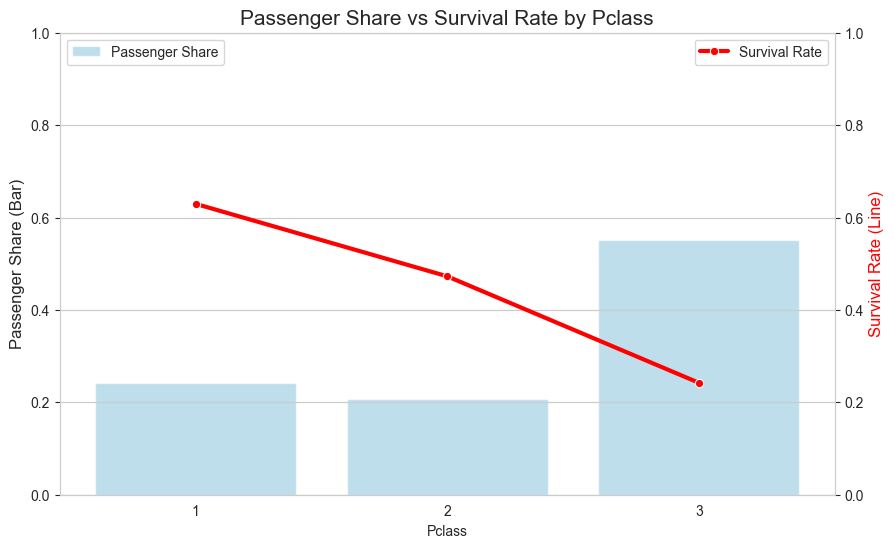

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 집계
# Pclass별로 전체 인원(count)과 생존율(mean)을 계산합니다.
pclass_stats = df.groupby('Pclass')['Survived'].agg(['count', 'mean']).reset_index()

# 전체 승객 대비 각 등급의 비중(Passenger Share) 계산
total_passengers = pclass_stats['count'].sum()
pclass_stats['Passenger_Share'] = pclass_stats['count'] / total_passengers
pclass_stats.columns = ['Pclass', 'Passenger_Count', 'Survival_Rate', 'Passenger_Share']

print("--- Pclass 분석 데이터 ---")
print(pclass_stats)

# 2. 시각화
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# (A) 막대 그래프: 전체 좌석 대비 각 클래스의 비중 (Passenger Share)
ax1 = sns.barplot(x='Pclass', y='Passenger_Share', data=pclass_stats, alpha=0.6, color='skyblue', label='Passenger Share')
ax1.set_ylabel('Passenger Share (Bar)', fontsize=12)
ax1.set_ylim(0, 1.0) # 비율이므로 0~1 사이로 설정

# (B) 꺾은선 그래프: 클래스별 생존율 (Survival Rate)
# 보조축(twinx)을 사용하여 같은 X축 위에 다른 단위의 Y축을 겹칩니다.
ax2 = ax1.twinx()
sns.lineplot(x=pclass_stats.index, y='Survival_Rate', data=pclass_stats, marker='o', color='red', linewidth=3, ax=ax2, label='Survival Rate')
ax2.set_ylabel('Survival Rate (Line)', color='red', fontsize=12)
ax2.set_ylim(0, 1.0)

plt.title('Passenger Share vs Survival Rate by Pclass', fontsize=15)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [27]:
# 1. 8가지 모델을 사용한 데이터 분석 및 성능 순위 산정
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 8가지 모델 정의
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# 모델 학습 및 평가
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = acc

# 정확도 기준 내림차순 정렬
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)

print("--- 모델별 성능 순위 ---")
for rank, (name, score) in enumerate(sorted_results, 1):
    print(f"{rank}위: {name} ({score:.4f})")

--- 모델별 성능 순위 ---
1위: Decision Tree (0.8212)
2위: Random Forest (0.8156)
3위: Gradient Boosting (0.8101)
4위: Logistic Regression (0.7821)
5위: AdaBoost (0.7821)
6위: Gaussian NB (0.7765)
7위: KNN (0.7598)
8위: SVM (0.6592)


In [28]:
# 2. 성능 상위 4개 모델을 추출하여 앙상블(Voting) 모델 생성
from sklearn.ensemble import VotingClassifier

# 상위 4개 모델 선택
top_4_names = [name for name, score in sorted_results[:4]]
estimators = [(name, models[name]) for name in top_4_names]

print(f"앙상블에 참여하는 상위 4개 모델: {top_4_names}")

# 소프트 보팅 방식의 앙상블 모델 생성
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model.fit(X_train, y_train)

ensemble_acc = accuracy_score(y_test, ensemble_model.predict(X_test))
print(f"앙상블 모델 초기 정확도: {ensemble_acc:.4f}")

앙상블에 참여하는 상위 4개 모델: ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
앙상블 모델 초기 정확도: 0.8380


In [29]:
# 3. 앙상블 모델에 대한 하이퍼파라미터 튜닝 (GridSearchCV 활용)
from sklearn.model_selection import GridSearchCV

# 보팅 가중치 조합을 통한 하이퍼파라미터 튜닝
param_grid = {
    'weights': [
        [1, 1, 1, 1], 
        [2, 1, 1, 1], 
        [1, 2, 1, 1], 
        [1, 1, 2, 1], 
        [1, 1, 1, 2]
    ]
}

grid_search = GridSearchCV(ensemble_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_ensemble = grid_search.best_estimator_
print(f"최적의 가중치 파라미터: {grid_search.best_params_}")
print(f"튜닝 후 교차 검증 평균 정확도: {grid_search.best_score_:.4f}")

최적의 가중치 파라미터: {'weights': [1, 1, 1, 2]}
튜닝 후 교차 검증 평균 정확도: 0.8160


최종 앙상블 모델 테스트 정확도: 0.8324

[분류 보고서]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



C:\Users\user\AppData\Local\Temp\ipykernel_18028\2805522925.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_scores, y=comparison_names, palette='magma')


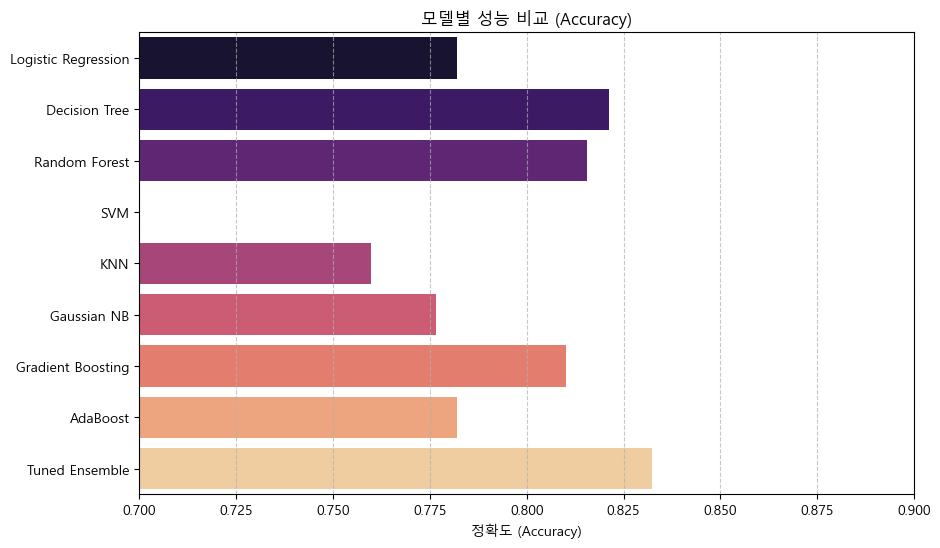

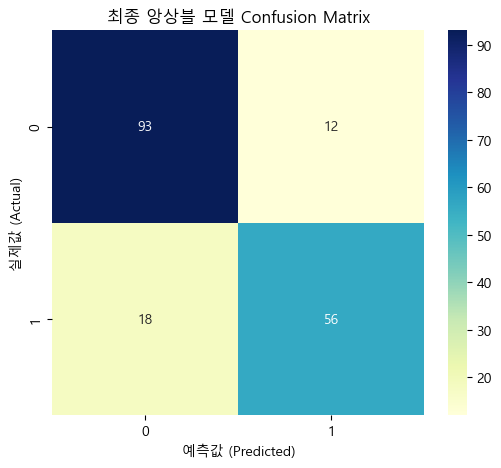

In [30]:
# 4. 튜닝된 앙상블 모델의 최종 성능 분석 및 결과 시각화
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 최종 테스트 데이터 예측
final_pred = best_ensemble.predict(X_test)
final_acc = accuracy_score(y_test, final_pred)

print(f"최종 앙상블 모델 테스트 정확도: {final_acc:.4f}")
print("\n[분류 보고서]")
print(classification_report(y_test, final_pred))

# 시각화 1: 모델별 성능 비교 차트 (상위 8개 + 앙상블)
comparison_names = [name for name, score in model_results.items()]
comparison_scores = [score for name, score in model_results.items()]
comparison_names.append('Tuned Ensemble')
comparison_scores.append(final_acc)

plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정 (Windows)
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지
sns.barplot(x=comparison_scores, y=comparison_names, palette='magma')
plt.title('모델별 성능 비교 (Accuracy)')
plt.xlabel('정확도 (Accuracy)')
plt.xlim(0.7, 0.9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 시각화 2: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, final_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('최종 앙상블 모델 Confusion Matrix')
plt.xlabel('예측값 (Predicted)')
plt.ylabel('실제값 (Actual)')
plt.show()

In [31]:
test_df['Fare'].isna().sum()

NameError: name 'test_df' is not defined

In [ ]:
# Kaggle 제출용 파일(submission_titanic.csv) 생성 코드
# 1. Kaggle 제공 테스트 데이터 로드
test_df = pd.read_csv('data/titanic/test.csv')

# 2. 전처리: 학습 데이터와 동일한 피처 구성으로 맞춤
# Fare(요금) 결측치 1건이 있을 수 있으므로 중앙값으로 채움
test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].median())

# 성별 원-핫 인코딩 (Sex_male, Sex_female 생성)
test_df_processed = pd.get_dummies(test_df, columns=['Sex'])
test_df_processed

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,True,False
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,False,True
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,True,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,S,False,True


In [ ]:
# 모델이 학습할 때 사용한 피처와 순서 동일하게 선택
# X_train과 동일하게 ['Sex_male', 'Sex_female', 'Pclass', 'Fare'] 순서
X_submission = test_df_processed[['Sex_male', 'Sex_female', 'Pclass', 'Fare']]
# 3. 튜닝된 최적의 앙상블 모델로 예측 수행
final_test_preds = best_ensemble.predict(X_submission)
# 4. 제출 양식(PassengerId, Survived)에 맞춰 데이터프레임 생성
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_test_preds
})
# 5. CSV 파일로 저장 (Kaggle 제출용)
submission.to_csv("submission_titanic.csv", index=False)
print("성공적으로 'submission_titanic.csv' 파일이 생성되었습니다!")

성공적으로 'submission_titanic.csv' 파일이 생성되었습니다!
